In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

2026-01-10 09:36:19.328353: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768037779.684126      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768037779.782454      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768037780.670369      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768037780.670447      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768037780.670451      17 computation_placer.cc:177] computation placer alr

In [2]:
data_dir = '/kaggle/input/gtsrb-german-traffic-sign'
train_path = os.path.join(data_dir, 'Train')
test_path = os.path.join(data_dir, 'Test')

IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3
NUM_CATEGORIES = 43

print("Loading training data... this may take a minute.")
data = []
labels = []

for i in range(NUM_CATEGORIES):
    path = os.path.join(train_path, str(i))
    images = os.listdir(path)

    for img in images:
        try:
            image = Image.open(os.path.join(path, img))
            image = image.resize((IMG_HEIGHT, IMG_WIDTH))
            image = np.array(image)

            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

data = np.array(data)
labels = np.array(labels)

print("Data loaded!")
print(f"Total images: {data.shape[0]}, Image shape: {data.shape[1:]}")

Loading training data... this may take a minute.
Data loaded!
Total images: 39209, Image shape: (30, 30, 3)


In [3]:
'''
Split the data using test_train_split into X_train, X_val, y_train, y_val and normalize the data

'''
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train = X_train / 255.0
X_val = X_val / 255.0

# TODO: One-hot encode the labels "y_train and y_val"
y_train = to_categorical(y_train, NUM_CATEGORIES)
y_val = to_categorical(y_val, NUM_CATEGORIES)

In [4]:
# Write the CNN code below with Maxpool layer, dropout rate, flatten it
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, channels)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(rate=0.25),
    
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(rate=0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(rate=0.5),
    Dense(NUM_CATEGORIES, activation='softmax')
])

# After this compile the model using categorical_crossentropy loss, use adam optimizer and accuracy metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-10 09:40:09.098230: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 9, 9, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 612,427 (2.34 MB)

 Trainable params: 612,427 (2.34 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 51s 50ms/step - accuracy: 0.4825 - loss: 1.9121 - val_accuracy: 0.9665 - val_loss: 0.1535
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 49s 49ms/step - accuracy: 0.9413 - loss: 0.1957 - val_accuracy: 0.9872 - val_loss: 0.0512
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 48s 49ms/step - accuracy: 0.9671 - loss: 0.1101 - val_accuracy: 0.9888 - val_loss: 0.0472
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 48s 49ms/step - accuracy: 0.9763 - loss: 0.0817 - val_accuracy: 0.9908 - val_loss: 0.0427
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 48s 49ms/step - accuracy: 0.9802 - loss: 0.0650 - val_accuracy: 0.9945 - val_loss: 0.0234
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 48s 49ms/step - accuracy: 0.9821 - loss: 0.0554 - val_accuracy: 0.9946 - val_loss: 0.0264
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.9865 - loss: 0.0449 - val_accuracy: 0.9946 - val_loss: 0.0241
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 51s 52ms/step - accuracy: 0.9849 - loss: 0.0532 - 

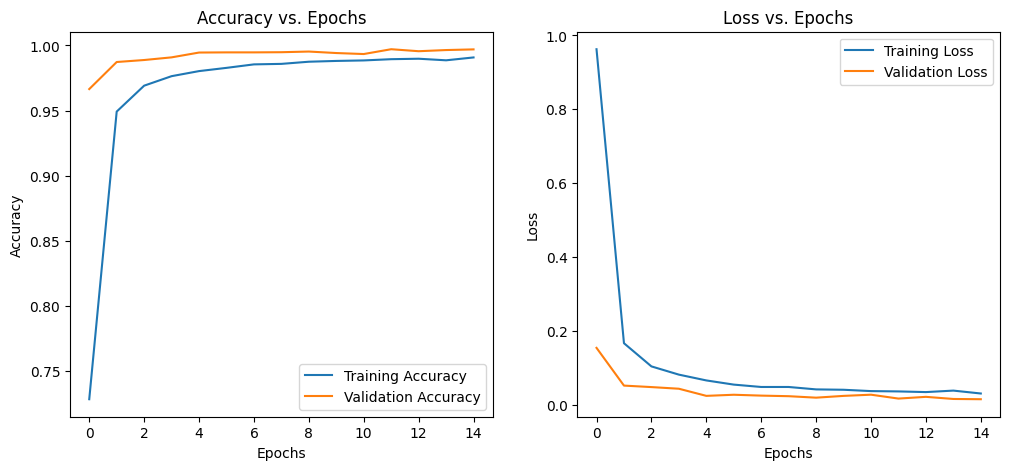

Loading test images...
395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step


Test Data Accuracy: 98.20%
Model saved successfully!


In [5]:
# Decide epochs and batch_size which fits best for your model
epochs = 15
batch_size = 32
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

y_test = pd.read_csv(os.path.join(data_dir, 'Test.csv'))
labels_test = y_test["ClassId"].values
imgs = y_test["Path"].values
data_test = []

print("Loading test images...")
for img in imgs:
    image = Image.open(os.path.join(data_dir, img))
    image = image.resize((IMG_HEIGHT, IMG_WIDTH))
    data_test.append(np.array(image))

X_test = np.array(data_test)
X_test = X_test / 255.0

pred = model.predict(X_test)
pred_classes = np.argmax(pred, axis=1)

from sklearn.metrics import accuracy_score
print(f"Test Data Accuracy: {accuracy_score(labels_test, pred_classes)*100:.2f}%")

model.save("traffic_classifier.h5")
print("Model saved successfully!")